# **Review 2.2:** Applying Machine Learing Algorithm to find involvement of players in potential match-fixing.

**Data Processing:**

Modifying the orginal dataset to find out players involved in Match-fixing.

The modified dataset includes the following features:

match_id

player_name

team_name

opponent_team

venue

date

total_balls

runs_scored

num_4s

num_6s

num_0s

num_1s

num_2s

strike_rate

average

deviation_from_average

Here is the code to prepare the above dataset:

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('ipl_data.csv')

# Initialize the ball_score column with the same values as the runs column
df['ball_score'] = df['runs']

# Iterate over the rows of the dataframe
for i in range(1, len(df)):
    # If the mid value is the same as the previous row
    if df.loc[i, 'mid'] == df.loc[i-1, 'mid']:
        # Subtract the runs value of the previous row from the current row
        df.loc[i, 'ball_score'] -= df.loc[i-1, 'runs']

# Save the updated dataframe to a new csv file
df.to_csv('updated_dataset.csv', index=False)

# Print a success message
print("The ball_score column was successfully added to the dataset and saved as updated_dataset.csv")

The ball_score column was successfully added to the dataset and saved as updated_dataset.csv


**Downloading the updated dataset:**

In [ ]:
from google.colab import files

# Download the CSV file
files.download('updated_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load the previous dataset
previous_dataset = pd.read_csv('updated_dataset.csv')

# Create a new DataFrame with 'player_name', 'match_id', 'team_name', 'opponent_team', 'venue', and 'date' columns
new_dataset = previous_dataset[['mid', 'batsman', 'bat_team', 'bowl_team', 'venue', 'date']].drop_duplicates()

# Calculate the total balls faced by each player in each match
total_balls = previous_dataset.groupby(['mid', 'batsman']).size().reset_index(name='total_balls')

# Calculate the total runs scored by each player in each match
runs_scored = previous_dataset.groupby(['mid', 'batsman'])['ball_score'].sum().reset_index(name='runs_scored')

# Merge the total_balls and runs_scored DataFrames with the new_dataset DataFrame
new_dataset = pd.merge(new_dataset, total_balls, how='left', left_on=['mid', 'batsman'], right_on=['mid', 'batsman'])
new_dataset = pd.merge(new_dataset, runs_scored, how='left', left_on=['mid', 'batsman'], right_on=['mid', 'batsman'])

# Rename the columns to match the new dataset
new_dataset.rename(columns={'mid': 'match_id', 'batsman': 'player_name', 'bat_team': 'team_name', 'bowl_team': 'opponent_team'}, inplace=True)

# Save the new DataFrame to a new CSV file
new_dataset.to_csv('player_match.csv', index=False)

# Calculate the number of 4's, 6's, 0's, 1's, and 2's scored by each player in each match
scores = [4, 6, 0, 1, 2]
for score in scores:
    score_df = previous_dataset[previous_dataset['ball_score'] == score].groupby(['mid', 'batsman']).size().reset_index(name=f'num_{score}s')
    new_dataset = pd.merge(new_dataset, score_df, how='left', left_on=['match_id', 'player_name'], right_on=['mid', 'batsman'])
    new_dataset.drop(columns=['mid', 'batsman'], inplace=True)
    new_dataset[f'num_{score}s'].fillna(0, inplace=True)

# Calculate the strike rate for each player in each match
new_dataset['strike_rate'] = new_dataset['runs_scored'] / new_dataset['total_balls'] * 100

# Calculate the average runs scored by each player across all matches
player_average_runs = new_dataset.groupby('player_name')['runs_scored'].mean().reset_index(name='average')
new_dataset = pd.merge(new_dataset, player_average_runs, how='left', on='player_name')

# Calculate the deviation from average for each player in each match
new_dataset['deviation_from_average'] = new_dataset['runs_scored'] - new_dataset['average']

# Save the updated DataFrame to a new CSV file
new_dataset.to_csv('player_match_updated.csv', index=False)

# Print a success message
print("The new dataset with additional columns was successfully created and saved as player_match_updated.csv")

The new dataset with additional columns was successfully created and saved as player_match_updated.csv


**Downloading the modified dataset:**

In [ ]:
from google.colab import files

# Download the CSV file
files.download('player_match_updated.csv')

**Data visualizaton 1:**

This graph shows, who are likely involved in match-fixing vs. players who are not involved in match-fixing.

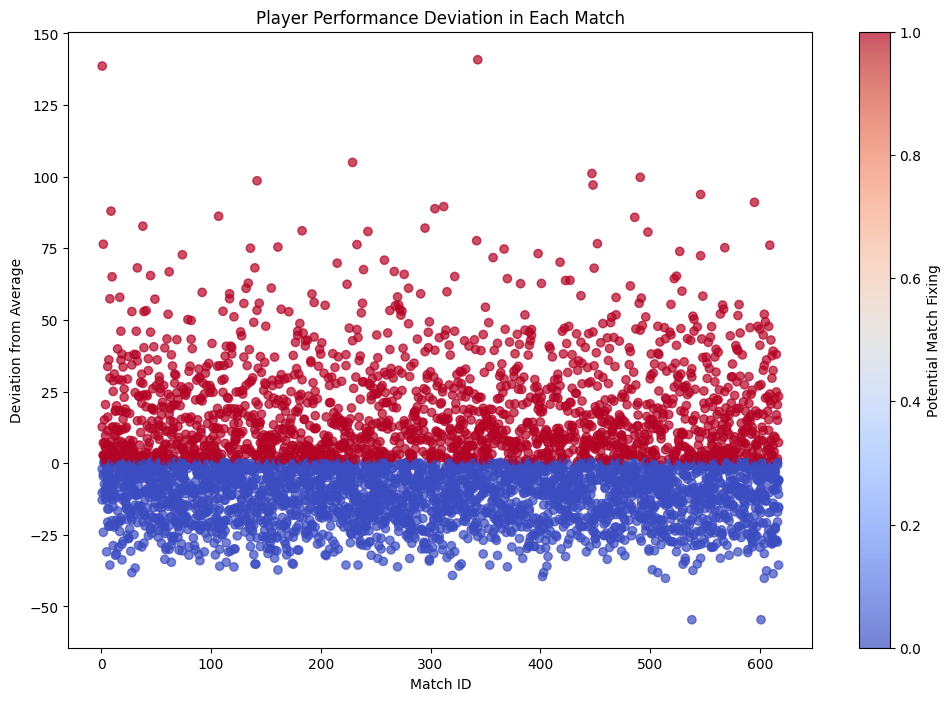

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
dataset = pd.read_csv('player_match_updated.csv')

# Define threshold for deviation to indicate potential match-fixing
threshold = 0.5  # Adjust as needed

# Create a new column indicating potential match-fixing
dataset['match_fixing'] = dataset['deviation_from_average'] > threshold

# Create a scatter plot
plt.figure(figsize=(12, 8))

# Plot players' performance deviation in each match
plt.scatter(dataset['match_id'], dataset['deviation_from_average'], c=dataset['match_fixing'], cmap='coolwarm', alpha=0.7)

# Add labels and title
plt.title('Player Performance Deviation in Each Match')
plt.xlabel('Match ID')
plt.ylabel('Deviation from Average')

# Add a colorbar legend
cbar = plt.colorbar()
cbar.set_label('Potential Match Fixing')

plt.show()


**Outliers detection:**

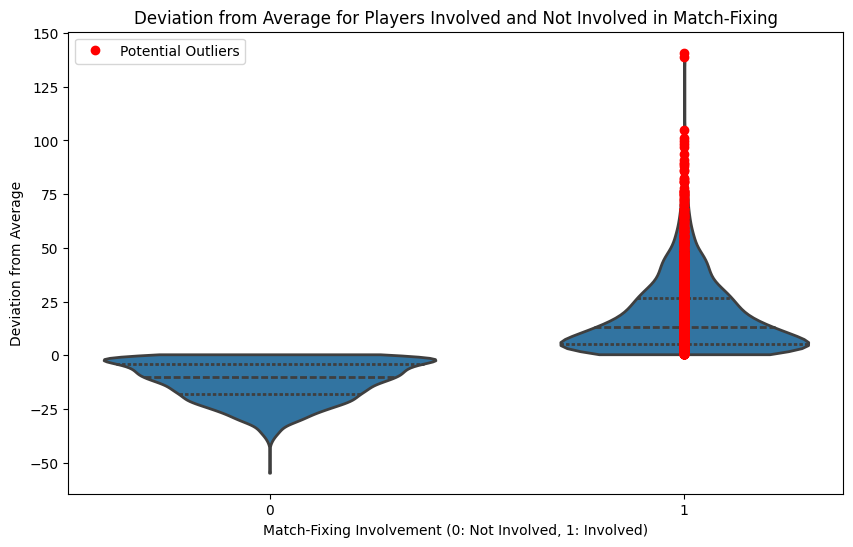

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('player_match_updated.csv')

# Define threshold for deviation to indicate potential match-fixing
threshold = 0.5  # Adjust as needed

# Create binary label based on deviation
dataset['match_fixing_label'] = (dataset['deviation_from_average'] > threshold).astype(int)

# Create a violin plot with outliers detection
plt.figure(figsize=(10, 6))
sns.violinplot(x='match_fixing_label', y='deviation_from_average', data=dataset, inner='quartile', cut=0,
               linewidth=2)
plt.title('Deviation from Average for Players Involved and Not Involved in Match-Fixing')
plt.xlabel('Match-Fixing Involvement (0: Not Involved, 1: Involved)')
plt.ylabel('Deviation from Average')

# Add annotations for potential outliers
outliers = dataset[dataset['match_fixing_label'] == 1]['deviation_from_average']
plt.plot([1] * len(outliers), outliers, 'ro', label='Potential Outliers')

plt.legend()
plt.show()



1. We load the player_match_updated.csv dataset.
2. We define a threshold value for the deviation_from_average column.
3. We create a binary label match_fixing_label indicating potential involvement in match-fixing based on the threshold.
4. We create a violin plot with outliers detection, which provides a clearer representation of the distribution of deviation_from_average for players involved and not involved in match-fixing.
5. We identify potential outliers among players involved in match-fixing and annotate them as red circles.

By examining the violin plot, you can visually identify players with significantly higher deviation from average, indicating potential involvement in match-fixing. Adjust the threshold and visualization parameters as needed for your analysis.

**Data Visualization 2:**

Performance curve of each player in all the matches played.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
dataset = pd.read_csv('player_match_updated.csv')

# Get unique player names
players = dataset['player_name'].unique()

# Plot each player's performance separately
for player in players:
    player_data = dataset[dataset['player_name'] == player]
    plt.figure(figsize=(10, 6))  # Adjust size as needed
    plt.plot(player_data['match_id'], player_data['deviation_from_average'])
    plt.title(f'{player} Performance Deviation for Each Match')
    plt.xlabel('Match ID')
    plt.ylabel('Deviation from Average')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


Detecting players involved in potential match-fixing using Random Forest algorithm based on the provided features, we can use the following Python code:

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
dataset = pd.read_csv('player_match_updated.csv')

# Define threshold for deviation to indicate potential match-fixing
threshold = 0.5  # Adjust as needed

# Create a binary label based on deviation
dataset['match_fixing'] = (dataset['deviation_from_average'] > threshold).astype(int)

# Define features (X) and target variable (y)
X = dataset.drop(['player_name', 'team_name', 'opponent_team', 'venue', 'date', 'match_fixing'], axis=1)
y = dataset['match_fixing']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Get feature importances
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index=X_train.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)
print("Feature Importances:")
print(feature_importances)


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       571
           1       1.00      1.00      1.00       375

    accuracy                           1.00       946
   macro avg       1.00      1.00      1.00       946
weighted avg       1.00      1.00      1.00       946

Feature Importances:
                        Importance
deviation_from_average    0.598616
runs_scored               0.151575
total_balls               0.062395
num_1s                    0.053666
num_4s                    0.048921
average                   0.032044
strike_rate               0.021447
num_6s                    0.017535
num_2s                    0.009040
num_0s                    0.002391
match_id                  0.002371


In the context of identifying potential match-fixing, the dependent variable would typically be a binary indicator of whether a player is involved in match-fixing or not. However, it seems like your dataset doesn't directly contain such a label.

In this case, you can create a label based on certain criteria. For example, you could define a threshold for the deviation_from_average column, and if the deviation exceeds this threshold, you can label that player as potentially involved in match-fixing.

Here's how you can do it:

1. Define a threshold value for the deviation_from_average column.
2. Create a new binary column where 1 indicates potential involvement in match-fixing and 0 indicates no involvement.
3. This binary column will be your dependent variable (target).

In [ ]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('player_match_updated.csv')

# Define threshold for deviation to indicate potential match-fixing
threshold = 0.5  # Adjust as needed

# Create binary label based on deviation
dataset['match_fixing_label'] = (dataset['deviation_from_average'] > threshold).astype(int)

# Save the modified dataset to a new CSV file
dataset.to_csv('modified_player_match_updated.csv', index=False)


In [ ]:
# Save the modified dataset to a new CSV file
dataset.to_csv('modified_player_match_updated.csv', index=False)


Downloading the modified dataset which contains the new feature: 'match_fixing_label'

In [ ]:
from google.colab import files

# Download the CSV file
files.download('modified_player_match_updated.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Applying Random forest Algorithm on the 'modified_player_match_updated.csv' dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv('modified_player_match_updated.csv')

# Preprocessing
# Assuming 'deviation_from_average' is already a numerical feature
# If there are categorical features, you'll need to encode them as well

# Handle missing values if any
df = df.dropna(subset=['deviation_from_average'])

# Feature scaling
scaler = StandardScaler()
df['deviation_from_average_scaled'] = scaler.fit_transform(df[['deviation_from_average']])

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df['deviation_from_average_scaled'], df['match_fixing_label'], test_size=0.2, random_state=42)

# Training the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train.values.reshape(-1, 1), y_train)

# Predicting
predictions = clf.predict(X_test.values.reshape(-1, 1))

# Evaluating the model
print(classification_report(y_test, predictions))

# Identifying players potentially involved in match-fixing
# Assuming 'player_name' is a column in your dataframe and 'match_fixing_label' is the target variable
suspected_players = df.loc[df['match_fixing_label'] == 1, 'player_name']
print(suspected_players)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       571
           1       1.00      1.00      1.00       375

    accuracy                           1.00       946
   macro avg       1.00      1.00      1.00       946
weighted avg       1.00      1.00      1.00       946

1           BB McCullum
2            RT Ponting
7            MEK Hussey
9              SK Raina
10             JDP Oram
             ...       
4714           IR Jaggi
4716           SA Yadav
4718    NM Coulter-Nile
4725          KH Pandya
4729         MG Johnson
Name: player_name, Length: 1829, dtype: object


**Data Visualization 3:**

The following plot shows in how many the number of matches a player is found to be involved in match-fixing.

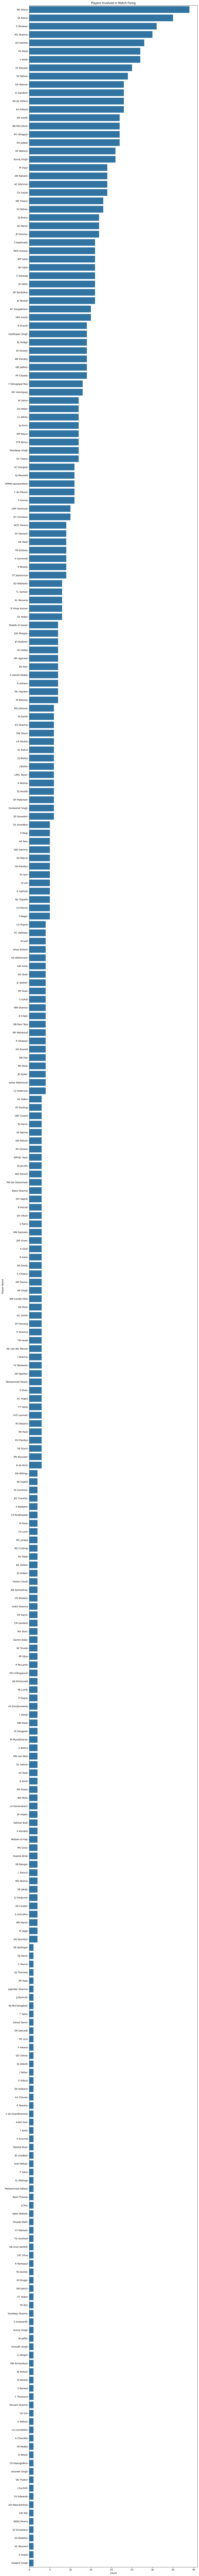

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('modified_player_match_updated.csv')

# Assuming 'player_name' is the column with the players' names
# and 'match_fixing_label' is the binary label indicating match-fixing involvement

# Filter the DataFrame for players involved in match-fixing
involved_players = df[df['match_fixing_label'] == 1]

# Count the number of times each player appears
player_counts = involved_players['player_name'].value_counts()

# Create a horizontal bar plot with a larger figure size
plt.figure(figsize=(12, len(player_counts) * 0.5))  # Adjust the 0.5 factor as needed
sns.barplot(y=player_counts.index, x=player_counts.values, orient='h')
plt.title('Players Involved in Match Fixing')
plt.ylabel('Player Name')
plt.xlabel('Count')
plt.tight_layout()

# Show the plot
plt.show()


The graph being plotted using the Python code is a horizontal bar plot designed to display the number of times each player is counted in the context of match-fixing involvement. Here’s what the graph indicates:

Player Names: Displayed along the y-axis, each bar represents a unique player.
Count: The length of each bar on the x-axis represents the count of how many times each player has been flagged for match-fixing involvement based on the dataset.
Clarity: By increasing the size of the plot and the length of the y-axis, the graph aims to present the data without any overlap, ensuring that each player’s name is clearly visible.
This visualization helps to easily identify and compare the frequency of match-fixing flags among players. It’s important to note that this is a data-driven representation and should not be taken as definitive proof of wrongdoing without proper investigation and due process.

Not all players from the dataset are involved in match-fixing. The dataset likely contains information on a variety of players, and the match_fixing_label column is used to indicate whether a player is suspected of being involved in match-fixing. In the visualization code provided earlier, the filter df[df['match_fixing_label'] == 1] is used to select only those players who are flagged for potential match-fixing involvement based on the dataset’s criteria.

It’s important to remember that such data-driven flags are indicators and not conclusive evidence of wrongdoing. Proper investigation and legal processes are necessary to determine actual involvement in match-fixing. The visualization helps to identify patterns or anomalies in the data that may warrant further investigation.